
![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
## Project 4: Web Scraping Job Postings
#### NoteBook 2 - Cleaning/EDA
## Submitted by Roshan Lulu

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator.

Once you have collected and cleaned the data, you will use it to answer the two questions outlined above.

### Read in the scraped Job posts data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [4]:
path = './database/Job_Posts_final.csv'
jobposts = pd.read_csv(path)
data = jobposts
# job_posts_df.head()

#### Check Shape and Head of the Data

In [5]:
print('Shape of the data', data.shape)
data.head(10)

Shape of the data (2831, 13)


,keyword,pagenum,title,region,location,salary,worktype,adv,classif,jd1,jd2,jd3,url
0,Data-Science,1,Data Engineer/Scientist/Analytics Consultant,"CBD, Inner West & Eastern Suburbs",Sydney,Competitive and negotiable,Full Time,BI & DW Australia -,Information & Communication Technology,[],['Experience with Hadoop & Spark and related c...,"['\r\n', '\r\nThis leading Australian Professi...",https://www.seek.com.au/job/33394134?type=stan...
1,Data-Science,1,Senior Manager - Data Science,"CBD, Inner West & Eastern Suburbs",Sydney,"$150 - $180,000 package",Full Time,Finite IT Recruitment Solutions -,Information & Communication Technology,"['I am currently looking for a ', 'Senior Mana...",['You will possess a strong background in: Sta...,"['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33390778?type=stan...
2,Data-Science,1,Head of Data Science - ML & AI,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,Ethos BeathChapman -,Information & Communication Technology,"['We are looking for a Head of Data Science, M...","['Strong experience in analytical tools, proce...","['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33349090?type=stan...
3,Data-Science,1,Head of Data Science & Analytics | Strategic r...,"CBD, Inner West & Eastern Suburbs",Sydney,Excellent Salary Package on offer,Full Time,Data Talent Pty Ltd -,Information & Communication Technology,[],['A unique Career opportunity along with an ex...,"['\r\n', '\r\nEssential Duties and Responsibil...",https://www.seek.com.au/job/33338994?type=stan...
4,Data-Science,1,Head of Data Science &amp; Products,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,TABCORP -,Science & Technology,"['Our Company', 'Tabcorp is one of the few int...","['Provide leadership, mentoring and developmen...","['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33329262?type=stan...
5,Data-Science,1,Head of Data Science &amp; Products,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,TABCORP -,Science & Technology,"['Our Company', 'Tabcorp is one of the few int...","['Provide leadership, mentoring and developmen...","['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33329263?type=stan...
6,Data-Science,1,Head of Data Science &amp; Products,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,TABCORP -,Information & Communication Technology,"['Our Company', 'Tabcorp is one of the few int...","['Provide leadership, mentoring and developmen...","['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33329261?type=stan...
7,Data-Science,1,Head of Data Science - Unique Career Opportuni...,"CBD, Inner West & Eastern Suburbs",Sydney,Excellent Salary Package plus Bonus,Full Time,Data Talent Pty Ltd -,Information & Communication Technology,['As head of Data Science will lead a team of ...,['A unique Career opportunity along with an ex...,"['\r\n', '\r\n', '\r\n', '\r\n', '\r\n', '\r\n...",https://www.seek.com.au/job/33338996?type=stan...
8,Data-Science,1,Computational Statistician | Data Science and ...,"CBD, Inner West & Eastern Suburbs",Sydney,NaN,Full Time,Displayr -,Science & Technology,"['About Us', 'Displayr is a rapidly growing da...",['Creating analysis and visualization features...,"['\r\n \r\n', '\r\n', '\r\n', '\r\n',...",https://www.seek.com.au/job/33329506?type=stan...
9,Data-Science,1,"Junior Data Scientist (Modelling, Insights & D...",NaN,Sydney,$60-90k,Full Time,Correlate Resources -,Consulting & Strategy,[],['Engaging with internal stakeholders to consu...,"[""Our client is an Australian market leader in...",https://www.seek.com.au/job/33314604?type=stan...


#### Check Features

In [6]:
data.columns

Index(['keyword', 'pagenum', 'title', 'region', 'location', 'salary',
       'worktype', 'adv', 'classif', 'jd1', 'jd2', 'jd3', 'url'],
      dtype='object')

#### Check for Null Values and DataTypes  out of data(2831,13)
- Salary - 1808 null values - Clean it , and impute null with 0
- Region - 356 null values - Clean it, impute wih Unknown Region
- Location, Worktype, Classifier - 1 ( Drop that row)

In [7]:
# Check the null values in the dataset
# Function to check the null counts in a dataframe
def checknullcount(df):
    info = []
    columns = ('Feature', 'Nullcount', 'Dtypes')
    for col in df.columns:
        nullcount = df[col].isnull().sum()
        datatype = df[col].dtypes
        info.append([col, nullcount, datatype])
    return (pd.DataFrame(columns=columns, data=info).sort_values('Nullcount', ascending = False))

(checknullcount(data))

,Feature,Nullcount,Dtypes
5,salary,1808,object
3,region,356,object
4,location,1,object
6,worktype,1,object
8,classif,1,object
0,keyword,0,object
1,pagenum,0,int64
2,title,0,object
7,adv,0,object
9,jd1,0,object


In [8]:
# Delete row with lot of null values
data = data[pd.notnull(data['location'])]
data.reset_index(inplace = True, drop = True)

In [9]:
# Revisiting the shape
print(data.shape)
(checknullcount(data))

(2830, 13)


,Feature,Nullcount,Dtypes
5,salary,1807,object
3,region,355,object
0,keyword,0,object
1,pagenum,0,int64
2,title,0,object
4,location,0,object
6,worktype,0,object
7,adv,0,object
8,classif,0,object
9,jd1,0,object


### Clean  Title

In [10]:
# Check unique values and their count
print(data['title'].nunique())
data['title'].value_counts()

1656


Business Analyst                                                                    207
Senior Business Analyst                                                              69
Data Analyst                                                                         38
Data Scientist                                                                       27
Business Systems Analyst                                                             23
Technical Business Analyst                                                           17
Business Intelligence Analyst                                                        17
Digital Business Analyst                                                             13
Business Process Analyst                                                             12
Business Analyst                                                                     11
Agile Business Analyst                                                               11
Managed Services, Trade Order Ma

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# Join all the Job Titles
all_titles = [title for title in data['title']]

# Use Count vectorizer to get the  most used names in titles
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,
                             preprocessor = None,stop_words = 'english',max_features = 1000) 

# Fit the titles to the model
train_data_features = vectorizer.fit_transform(all_titles)

# Get the words and the count from the model
title_words = pd.DataFrame(vectorizer.transform(all_titles).todense(), columns=vectorizer.get_feature_names())

# Pick the top 40 to create the job title category
title_words.sum().nlargest(20)

analyst         1745
business        1387
data             536
senior           447
manager          228
developer        191
consultant       179
intelligence     156
bi               125
project          107
systems          105
technical         94
analytics         93
scientist         83
management        80
reporting         79
lead              78
support           74
specialist        73
contract          70
dtype: int64

#### Create a new column indicating Title code
    I assume the seniority of the job can be obtained from  the job title.
    I am selecting a few key words that i think is the most used text
    Title
    0 - Junior/Associate 
    1 - <No Tag>/ Mide-level
    2 - Senior/ Officer, 
    3 - Principal/Consultant/Architect/Designer, 
    4 - Lead/Expert/Group, 
    5 - Manager, 
    6 - Post-Doctoral, 
    7 - Head/Director/

In [13]:
# Assign the code to the Titles as described above
code_list = []
for row in range(0, len(data)):
    title = data.ix[row, 'title'].lower()
    code = 1
    if 'head' in title or 'director' in title:
        code = 7
    elif 'post' in title:
        code = 6
    elif 'manager' in title:
        code = 5
    elif 'lead' in title or 'expert' in title or 'group' in title:
        code = 4
    elif 'principal' in title or 'consultant' in title or 'architect' in title or 'designer' in title:
        code =3
    elif 'senior' in title or 'officer' in title:
        code = 2
    elif 'junior' in title or 'associate' in title:
        code = 0
    else:
        pass
    code_list.append(code)

# Create a new column
data['Title_Code'] = code_list

In [14]:
# Drop title columns
data.drop('title', axis =1, inplace = True)

### Clean Location

In [15]:
# Check unique values and their count - Clean Column
print(data['location'].nunique())
data['location'].value_counts()

3


Sydney       1679
Melbourne     851
Brisbane      300
Name: location, dtype: int64

#### Create a new column indicating City/ Code
    Region_C
    0 - Sydney
    1 - Melbourne
    2 - Brisbane
    3 - Unknown/Others

In [16]:
# Assign the code to the Titles as described above

code_list = []
for row in range(0, len(data)):
    city = data.ix[row, 'location'].lower()
    code = 4
    if 'sydney' in city:
        code = 0
    elif 'melbourne' in city:
        code = 1
    elif 'brisbane' in city:
        code = 2
    else:
        pass
    code_list.append(code)

# Create a new column

data['City_Code'] = code_list

In [17]:
# Drop Location columns

data.drop('location', axis =1, inplace = True)

### Clean Region

In [18]:
# Check unique values and their count - Clean Column

print(data['region'].nunique())
data['region'].value_counts()

# Fill null values

data['region'].isnull().sum()
data['region'].fillna('Unknown', inplace = True)
# data.ix[data['City_Code'] == 2, 'region'].value_counts()

15


#### Create a new column indicating Region Code code
    Region_Code
    Sydney
    0 - CBD, Inner West & Eastern Suburbs
    1 - Parramatta & Western Suburbs
    2 - North Shore & Northern Beaches 
    3 - Ryde & Macquarie Park 
    4 - North West & Hills District 
    5 - Southern Suburbs & Sutherland Shire , South West & M5 Corridor 
    6 - Unknown
    Melbourne
    7 - CBD & Inner Suburbs                
    8 - Bayside & South Eastern Suburbs
    9 - Eastern Suburbs
    10 - Northern Suburbs
    11 - Western Suburbs
    12 - Unknown
    Brisbane
    13 - CBD & Inner Suburbs
    14 - Southern Suburbs & Logan
    15 - Bayside & Eastern Suburbs
    16 - Northern Suburbs
    17 - Western Suburbs & Ipswich
    18 - Unknown

In [19]:
# Assign the code to the Titles as described above
code_list = []
for row in range(0, len(data)):
    region = data.ix[row, 'region']
    city = data.ix[row, 'City_Code']
    code = 6
    if city == 0:
        if 'CBD' in region:
            code = 0
        elif 'Parramatta' in region:
            code = 1
        elif 'Northern Beaches' in region:
            code = 2
        elif 'Ryde' in region:
            code = 3
        elif 'North West' in region:
            code = 4
        elif 'South West' in region:
            code = 5
        else:
            code = 6
    elif city == 1:
        if 'CBD' in region:
            code = 7
        elif 'Bayside' in region:
            code = 8
        elif 'Eastern' in region:
            code = 9
        elif 'Northern' in region:
            code = 10
        elif 'Western' in region:
            code = 11
        else:
            code = 12
    elif city == 2:
        if 'CBD' in region:
            code = 13
        elif 'South' in region:
            code = 14
        elif 'Eastern' in region:
            code = 15
        elif 'Northern' in region:
            code = 16
        elif 'Western' in region:
            code = 17
        else:
            code = 18
        
    code_list.append(code)

# Create a new column
data['Region_Code'] = code_list

In [20]:
# Drop Region columns

data.drop('region', axis =1, inplace = True)

### Clean Classification

In [21]:
# Check unique values and their count - Clean Column

print(data['classif'].nunique())
data['classif'].value_counts()


26


Information & Communication Technology    1987
Accounting                                 205
Banking & Financial Services               130
Consulting & Strategy                       85
Science & Technology                        65
Government & Defence                        63
Marketing & Communications                  53
Sales                                       50
Education & Training                        28
Insurance & Superannuation                  22
Human Resources & Recruitment               20
Healthcare & Medical                        19
Manufacturing, Transport & Logistics        15
Mining, Resources & Energy                  14
Administration & Office Support             14
Legal                                       11
Engineering                                  9
Call Centre & Customer Service               8
Design & Architecture                        6
Advertising, Arts & Media                    6
Real Estate & Property                       5
CEO & General

#### Creating a new column for Classification code
    0 - Information & Communication Technology
    1 - Science & Technology
    2 - Banking & Financial Services 
      - Accounting
    3 - Consulting & Strategy
      - Marketing & Communications 
    4 - Government & Defence
    5 - Education & Training
    6 - Healthcare & Medical
    7 - Others

In [22]:
# Assign the code to the classificatiob as described above
code_list = []
for row in range(0, len(data)):
    classif = data.ix[row, 'classif']
    code = 7
    if 'Information & Communication Technology' in classif:
        code = 0
    elif 'Science & Technology' in classif:
        code = 1
    elif 'Banking & Financial Services' in classif or 'Accounting' in classif:
        code = 2
    elif 'Consulting & Strategy' in classif or 'Marketing & Communications' in classif:
        code = 3
    elif 'Government & Defence' in classif:
        code = 4
    elif 'Education & Training' in classif:
        code = 5
    elif 'Healthcare & Medical' in classif:
        code = 6
    else:
        pass
    code_list.append(code)

# Create a new column
data['Classif_Code'] = code_list

In [23]:
# Drop the classification column
data.drop('classif', axis = 1, inplace = True)

### Clean Work Type

In [24]:
# Check unique values and their count - Clean Column

print(data['worktype'].nunique())
data['worktype'].value_counts()

4


Full Time          1682
Contract/Temp      1135
Part Time            11
Casual/Vacation       2
Name: worktype, dtype: int64

#### Add a new column for work type
    0 - Full Time
    1 - Contract/Temp
    2 - Others - Casual/Vacation/PartTime

In [25]:
# Assign the code to the work type as described above
code_list = []
for row in range(0, len(data)):
    worktype = data.ix[row, 'worktype']
    code = 2
    if 'Full Time' in worktype:
        code = 0
    elif 'Contract/Temp' in worktype:
        code = 1
    else:
        pass
    code_list.append(code)

# Create a new column
data['WorkType_Code'] = code_list

In [26]:
# Drop the classification column
data.drop('worktype', axis = 1, inplace = True)

### Clean Advertiser

In [27]:
# Check unique values and their count - Clean Column

print(data['adv'].nunique())
data['adv'].value_counts()

769


Paxus Australia Pty Ltd -                                                              70
Peoplebank Australia NSW -                                                             51
Hudson -                                                                               50
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years! -     43
Private Advertiser -                                                                   38
Robert Walters -                                                                       36
Randstad - Technologies -                                                              35
Australian Competition and Consumer Commission -                                       32
Perigon Group Pty Limited -                                                            32
Greythorn -                                                                            32
Hays Information Technology -                                                          29
Infinity P

#### Creating categories for advertisers
    There are multiple advertsers. Assuming that there are 2 kinds of advertisers, we will classify it to 2 groups
    0 - Recruiters/Consultants
    1 - Universities
    2 - Companies

In [28]:
# Assign the code to the work type as described above
code_list = []
for row in range(0, len(data)):
    adv = data.ix[row, 'adv'].lower()
    code = 2
    if 'recruit' in adv or 'consult' in adv:
        code = 0
    elif 'university' in adv:
        code = 1
    else:
        pass
    code_list.append(code)

# Create a new column
data['Adv_Code'] = code_list

In [29]:
# Drop the classification column
data.drop('adv', axis = 1, inplace = True)

### Clean the Keyword column

In [30]:
# Check unique values and their count - Clean Column

print(data['keyword'].nunique())
data['keyword'].value_counts()

5


Business-Analyst         1799
Business-Intelligence     580
Data-Analyst              280
Data-Science              140
Research-Scientist         31
Name: keyword, dtype: int64

#### Create a column for keyword categories
    0 - Data-Analyst
    1 - Data-Science
    2 - Research-Scientist
    3 - Business-Analyst
    4 - Business-Intelligence

In [31]:
# Assign the code to the work type as described above
code_list = []
for row in range(0, len(data)):
    keyword = data.ix[row, 'keyword']
    code = 4
    if 'Data-Analyst' in keyword:
        code = 0
    elif 'Data-Science' in keyword:
        code = 1
    elif 'Research-Scientist' in keyword:
        code = 2
    elif 'Business-Analyst' in keyword:
        code = 3
    else:
        pass
    print(code)
    code_list.append(code)

# Create a new column
data['KeyJob_Code'] = code_list

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [32]:
data['KeyJob_Code'].unique()

array([1, 0, 4, 2, 3])

In [33]:
# Drop the classification column
data.drop('keyword', axis = 1, inplace = True)

#### Inspect columns that are not relevant - url and pagenum

In [34]:
# Drop the columns

data.drop('url', axis = 1, inplace = True)

data.drop('pagenum', axis = 1, inplace = True)

### Clean Job Description column

In [35]:
import numpy as np

In [36]:
# Combine Job decsriptions into a single column
data['JobDescript']= data['jd1'].astype(str)+data['jd2'].astype(str)+data['jd3'].astype(str)
# data['combined'] = data.apply(lambda x:'%s_%s_%s' % (data['jd1'],data['jd2'],data['jd3']),axis=1)

In [37]:
# Drop individual job description columns

data.drop(['jd1', 'jd2', 'jd3'], axis = 1, inplace = True)

In [38]:
# There are no null values in the new job description

data['JobDescript'].isnull().sum()

0

In [39]:
replace_text = ['[',']',"'",'\\r','\\n','\\xa0',':',',','"']
for ch in replace_text:
    data['JobDescript'] = data['JobDescript'].map(lambda x: x.replace(ch,''))

In [40]:
data['JobDescript']

0       Experience with Hadoop & Spark and related clo...
1       I am currently looking for a  Senior Manager o...
2       We are looking for a Head of Data Science Mach...
3       A unique Career opportunity along with an exce...
4       Our Company Tabcorp is one of the few integrat...
5       Our Company Tabcorp is one of the few integrat...
6       Our Company Tabcorp is one of the few integrat...
7       As head of Data Science will lead a team of da...
8       About Us Displayr is a rapidly growing data sc...
9       Engaging with internal stakeholders to consult...
10      Forensic Data Analytics   Join PwCs  Forensic ...
11      THE ROLE Were looking for Data Scientist to jo...
12      Australian Start-up company expanding in Japan...
13      Summary of the Position   This is a fantastic ...
14      Experience using R SQL SAS  Bachelor degree in...
15      The Company This is company is rated one of th...
16      The Company News Corp Australia is the nations...
17      Like m

### Clean Salary

In [41]:
data['salary'].fillna(0, inplace = True)

In [42]:

# remove spaces in the salary content
def cleanstring(salary):
    t=''
    for i in salary:
        if(i.isdigit() 
           or i =='$' 
           or (i.lower() =='k' and (lasti == ' ' or lasti.isdigit()))
           or i == '%' or i == '.' or i == '-'):
            t += i
        lasti = i
    t = re.sub('12%','',t)
    t = re.sub('13.5%','',t)
    t = re.sub('10%','',t)
    t = re.sub('14%','',t)
    t = re.sub('15.4%','',t)
    t = re.sub('9.5%','',t)
    t = re.sub('17%','',t)
    t = re.sub('^[.]','', t)
    t = re.sub('(\.)(?!\d)', '', t)
    t = t.replace('..','')
    t = re.sub('[K,k]', '000', t)

#     if '176' in str(salary):
#         print(t)
    if(len(t) == 0):
        t = 0
    return t

In [43]:
data['clean_salary'] = [cleanstring(sal) if sal != 0 else 0 for sal in data['salary']]

In [44]:
data['clean_salary'] = [re.split("[\-$]+", sal) if sal != 0 else 0 for sal in data['clean_salary']]

In [45]:
data.loc[:,'sal1'] = [sal if type(sal) == int else sal[-1] for sal in data['clean_salary']]
data.loc[:,'sal2'] = [sal if type(sal) == int 
                else sal[-2] if len(sal) > 1
                else 0 
                for sal in data['clean_salary']]
data.loc[:,'sal3'] = [sal if type(sal) == int 
                else sal[-3] if len(sal) > 2
                else 0 
                for sal in data['clean_salary']]

In [46]:
# data['sal1'].fillna(0,inplace = True)
data['sal1'].value_counts()

0            2055
120000         52
               40
100000         34
150000         31
130000         24
800            23
140000         22
600            19
750            18
110000         18
100            18
850            17
75000          15
85000          15
95000          15
90000          14
70000          12
700             9
180000          9
149999          9
900             9
91799           8
112619          8
119999          8
110000.00       8
138256          8
160000          8
115000          8
78457           8
550             7
105000          7
96000           6
125000          6
220000          6
88              6
80000           6
60              5
650             5
1000            5
120000.00       4
137889          4
6               4
67              4
200000          4
450             4
121332          4
55000           4
780             3
0.00            3
129999          3
102580          3
89999           3
176353          3
29999           3
199999    

In [47]:
# Update 
data['sal1'].fillna(0,inplace = True)
data.sal1 = data.sal1.map(lambda x: int(float(x)) if x!='' else 0)

data['sal2'].fillna(0,inplace = True)
data.sal2 = data.sal2.map(lambda x: int(float(x)) if x!='' else 0)

data['sal3'].fillna(0,inplace = True)
data.sal3 = data.sal3.map(lambda x: int(float(x)) if x!='' else 0)
# data['sal1'].value_counts()
# # data['sal2'].fillna(0,inplace = True)
# data.loc[:,'sal2'] = [(float(sal)) for sal in data['sal2']]

# data['sal3'].fillna(0,inplace = True)
# data.loc[:,'sal3'] = [(float(sal)) for sal in data['sal3']]

In [48]:
# I have sal1 and sal 2
# I will copy sal 2 to sal1 if sal 1 is 0
salary = []
for index in range(0,len(data)):
    val = data.ix[index, 'sal1']
    if val == 0:
        if data.ix[index, 'sal2'] == 0:
            val = data.ix[index, 'sal2']
        else:
            val = data.ix[index, 'sal3']    
    else:
        pass
    salary.append(val)
data['Salary'] = salary

In [49]:

drop_col = ['sal1','sal2','sal3','clean_salary','salary']
data.drop(drop_col, axis = 1,inplace = True)

In [50]:
data.columns

Index(['Title_Code', 'City_Code', 'Region_Code', 'Classif_Code',
       'WorkType_Code', 'Adv_Code', 'KeyJob_Code', 'JobDescript', 'Salary'],
      dtype='object')

In [51]:
# Strip everything after K
# Split by -
# Strip everything before the 1st number
# delete 15.4% and 9.5% Super annuation

In [52]:
data.head()

,Title_Code,City_Code,Region_Code,Classif_Code,WorkType_Code,Adv_Code,KeyJob_Code,JobDescript,Salary
0,3,0,0,0,0,2,1,Experience with Hadoop & Spark and related clo...,0
1,5,0,0,0,0,0,1,I am currently looking for a Senior Manager o...,180000
2,7,0,0,0,0,2,1,We are looking for a Head of Data Science Mach...,0
3,7,0,0,0,0,2,1,A unique Career opportunity along with an exce...,0
4,7,0,0,1,0,2,1,Our Company Tabcorp is one of the few integrat...,0


#### Standardize the salary information to per annum
    - The salary is currently in per annum, per month, per day, per hour. I would like to standardize them all to per annum units
    - I am assuming that
    Salary < 20 - Invalid --> Salary = 0
    Salary < 100 - Per hour rate --> Salary(per hour) * 8(per day) * 22(per month) * 12(per annum)
    Salary < 1000 - Per day rate --> Salary(per day) * 22(per month) * 12(per annum)
    Salary < 10000 - Per Month rate --> Salary(per month) * 12(per annum)

In [53]:
std_salary = []
for index in range(0, len(data)):
    salary = data.ix[index, 'Salary'] 
    if salary < 20:
        salary = 0
    elif salary < 100:
        salary = salary * 8 * 22 * 12
    elif salary < 1000:
        salary = salary * 22 * 12
    elif salary < 10000:
        salary = salary * 12
    else:
        pass
    std_salary.append(salary)
data['Salary'] = std_salary

In [54]:
# Do NLP on JOB Description

### I want to check how the distribution of the salary before proceeding. Are there any OUTLIERS?
   Creating my training set with valid salaries(i.e. salary > 0) and checking the slaary distribution on them

In [55]:
data_valid_y = data[data['Salary'] != 0]
data_valid_y.reset_index(inplace = True, drop = True)
data_valid_y.shape
# train_seek['Salary']

(724, 9)

In [56]:
data_valid_y.head()

,Title_Code,City_Code,Region_Code,Classif_Code,WorkType_Code,Adv_Code,KeyJob_Code,JobDescript,Salary
0,5,0,0,0,0,0,1,I am currently looking for a Senior Manager o...,180000
1,0,0,6,3,0,2,1,Engaging with internal stakeholders to consult...,90000
2,1,0,6,0,0,0,1,Australian Start-up company expanding in Japan...,14400
3,1,0,0,7,0,2,1,Experience using R SQL SAS Bachelor degree in...,120000
4,1,0,0,1,0,2,1,Lead a small team of data analysts and data sc...,160000


In [57]:
data_valid_y.KeyJob_Code.value_counts()

3    443
4    160
0     73
1     35
2     13
Name: KeyJob_Code, dtype: int64

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

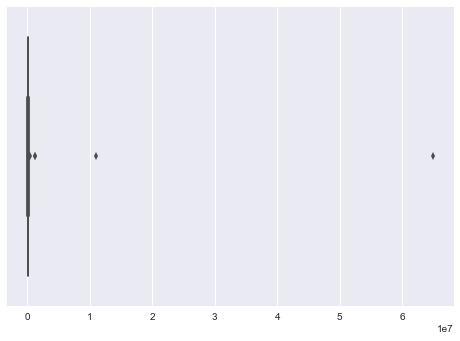

In [59]:
sns.boxplot(['Salary'], data = data_valid_y)
plt.show()

### Wow. There seem to be some outliers here! Let me check what they are.

In [60]:
# Thats the minimum value. Seems ok!
min(data_valid_y['Salary'])

12000

In [61]:
# Thats the maximum value. - WOW! . Some problem happened during cleaning
max(data_valid_y['Salary'])

65000000

In [62]:
# Let me check for salaries > 350,000
data_valid_y[data_valid_y['Salary'] > 350000]

,Title_Code,City_Code,Region_Code,Classif_Code,WorkType_Code,Adv_Code,KeyJob_Code,JobDescript,Salary
61,2,0,0,0,1,2,0,This is an exciting project where a changing r...,11000012
339,0,0,0,2,0,2,3,Contribute to the delivery of financial and co...,65000000
690,1,2,13,5,0,1,3,Seeking a highly experienced Business Analyst ...,1159908
691,1,2,13,0,0,1,3,Seeking a highly experienced Business Analyst ...,1159908


### There are 4 outliers and they seem to be valid values with some extra text that tagged along from the salary description.
#### I will take six digits out of it 

In [63]:
# Updating my salary in original datafra,e again!
std_salary = []
for index in range(0, len(data)):
    salary = data.ix[index, 'Salary'] 
    if salary > 350000:
        len_of_outlier = len(str(salary))
        if len_of_outlier == 8:
            salary = salary / 100
            if salary > 350000:
                salary = salary /10
        else:
            salary = salary / 10
    else:
        pass
    std_salary.append(salary)
data['Salary'] = std_salary

In [64]:
data_valid_y = data[data['Salary'] != 0]

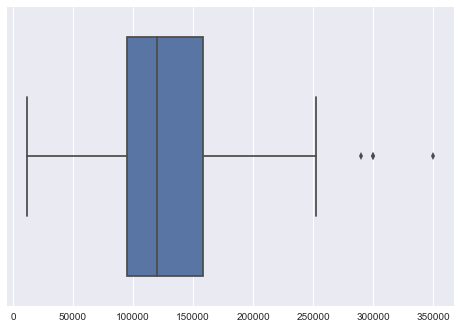

In [65]:
sns.boxplot(['Salary'], data = data_valid_y)
plt.show()

### The plot looks much better now ! The Salary column is finally CLEAN!

## Next ...Plotting the data 

#### 1. Whats the Job disctribution across cities?
    - Lot of jobs in Sydney
    - To be more specific, Lots of jobs in Sydney CBD

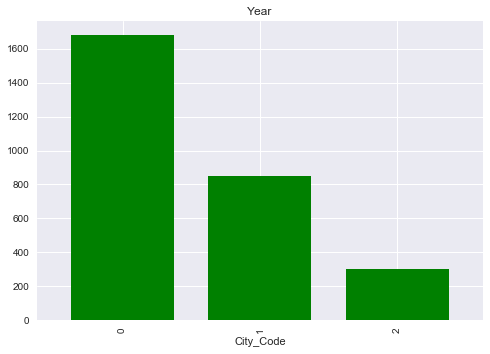

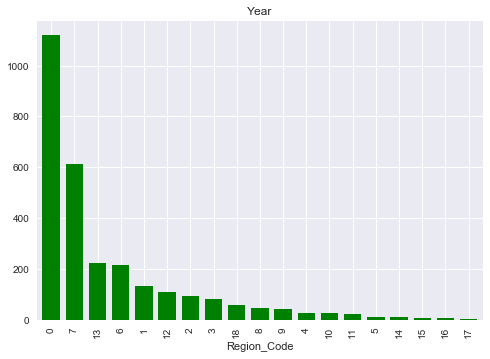

In [66]:
data_title_code = data.groupby('City_Code').size().sort_values(ascending=False)
data_title_code
data_title_code.plot(kind="bar", color="g", width=0.75, title='Year')
plt.show()


data_title_code = data.groupby('Region_Code').size().sort_values(ascending=False)
data_title_code
data_title_code.plot(kind="bar", color="g", width=0.75, title='Year')
plt.show()


#### Whats the title category with most jobs!
    - More jobs for Juniors!

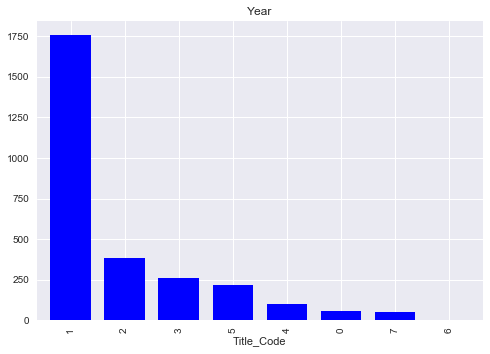

In [67]:
data_title_code = data.groupby('Title_Code').size().sort_values(ascending=False)
data_title_code
data_title_code.plot(kind="bar", color="b", width=0.75, title='Year')
plt.show()

# Infer: There are more Junior level roles when compared to the others

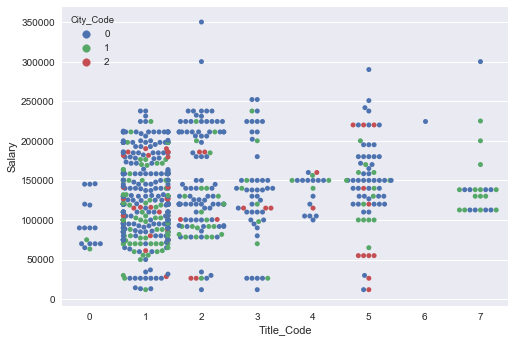

In [68]:
sns.swarmplot(x="Title_Code", y="Salary", hue = 'City_Code', data=data_valid_y)
plt.show()

In [69]:
data_valid_y['KeyJob_Code'].unique()

array([1, 0, 4, 2, 3])

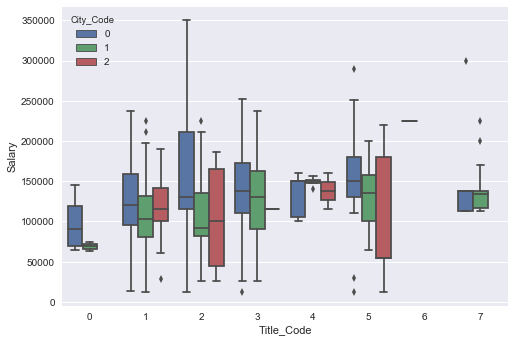

In [70]:
sns.boxplot(x="Title_Code", y="Salary", hue="City_Code", data=data_valid_y)
plt.show()

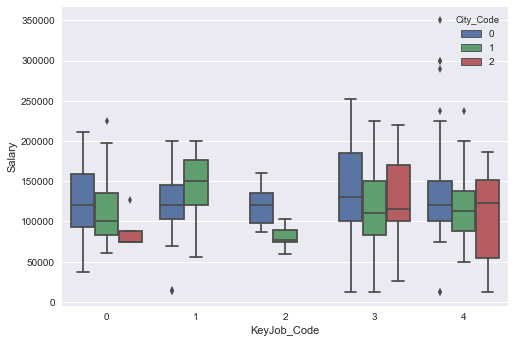

In [71]:
sns.boxplot(x="KeyJob_Code", y="Salary", hue='City_Code', data=data_valid_y)
plt.show()

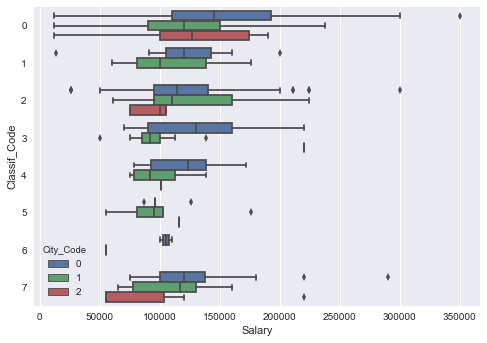

In [72]:
sns.boxplot(x="Salary", y="Classif_Code", hue='City_Code', data=data_valid_y, orient='h')
plt.show()

In [73]:
print(data_valid_y['KeyJob_Code'].value_counts())

3    443
4    160
0     73
1     35
2     13
Name: KeyJob_Code, dtype: int64


#### Maybe I should checkthe heatmap!

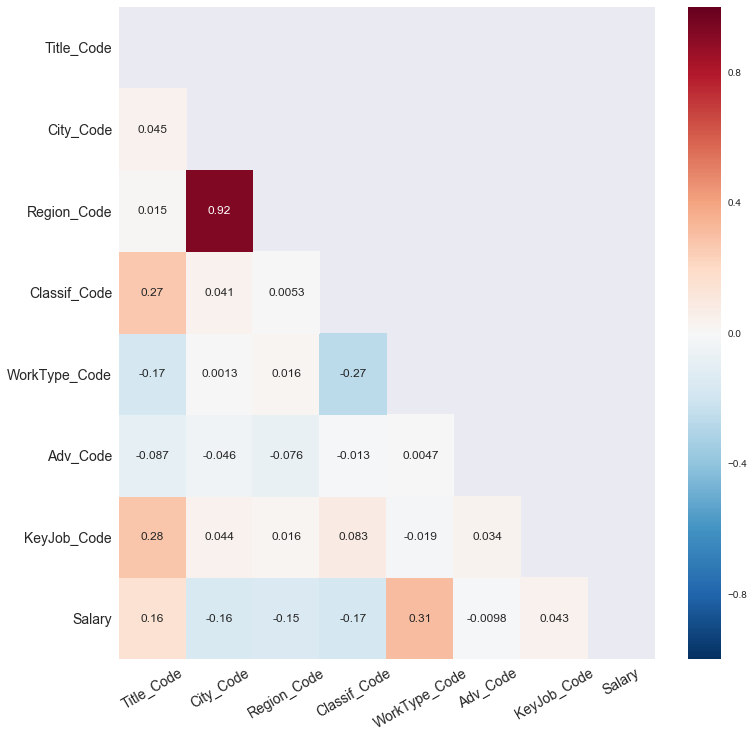

In [74]:
def correlation_heat_map(df):
    corrs = df.corr()
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12, 12))
    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()


correlation_heat_map(data_valid_y)

#### Was the heatmap helpful?
- Region and City code are correlated! I would be surprised if it wasnt
- Salary seems not extremely correlated with any of the features. Not helpful!

#### Back to the Job description, it is a lot of words to analyse!
- Since I am going to train my models using data points that have a salary, I am going to create dataframe for the most commonly used words in the Job Description. Now, I have created it based on all the jobs in the dataframe. Next step, I have to figure out how to do it with just the training set words adn then concatenate it with the others


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

#### Looking at the most commonly used words, there are some generic words which could be used as stop words!

In [76]:
data_valid_y.reset_index(drop = True, inplace = True)
data_w_text = data_valid_y
data_w_text.head()

,Title_Code,City_Code,Region_Code,Classif_Code,WorkType_Code,Adv_Code,KeyJob_Code,JobDescript,Salary
0,5,0,0,0,0,0,1,I am currently looking for a Senior Manager o...,180000.0
1,0,0,6,3,0,2,1,Engaging with internal stakeholders to consult...,90000.0
2,1,0,6,0,0,0,1,Australian Start-up company expanding in Japan...,14400.0
3,1,0,0,7,0,2,1,Experience using R SQL SAS Bachelor degree in...,120000.0
4,1,0,0,1,0,2,1,Lead a small team of data analysts and data sc...,160000.0


In [77]:
# Join all the Job Titles
all_text = [text for text in data_w_text['JobDescript']]

# Use Count vectorizer to get the  most used names in titles
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,
                             preprocessor = None,stop_words = 'english',max_features = 1000, ngram_range = (2,3)) 

# Fit the titles to the model
train_data_features = vectorizer.fit_transform(all_text)

# Get the words and the count from the model
job_desc_words = pd.DataFrame(vectorizer.transform(all_text).todense(), columns=vectorizer.get_feature_names())

# Pick the top 40 to create the job title category
job_desc_words.sum().nlargest(1000)
job_desc_words.head()

,12 months,12 months successful,13 january,13 january 2017,2010 cca,2010 cca additional,2010 regulatory,2010 regulatory instruments,2010 review,2010 review investigate,2017 months,2017 months automatically,400 words,ability work,accc aer,accc aer accc,accc aer called,accc aer functions,accc aer ii,accc aer responsibilities,accc aer seeking,accc aers,accc aers goals,accc aers work,accc gov,accc gov au,accc independent,accc independent commonwealth,accc specialist,accc specialist legal,accc supported,accc supported staff,access accc,access accc specialist,accounting related,accounting related fields,act 2010,act 2010 cca,act 2010 regulatory,act 2010 review,ad hoc,additional legislation,additional legislation promoting,additional roles,additional roles review,additionally want,additionally want build,administrative undertakings,administrative undertakings court,advanced excel,advertised externally,advertised externally 13,advice range,advice range accc,advocating policy,advocating policy changes,aer accc,aer accc independent,aer board,aer board separate,aer called,aer called fulfil,aer functions,aer functions maintain,aer ii,aer ii technically,aer independent,aer independent body,aer responsibilities,aer responsibilities apply,aer seeking,aer seeking applications,aers goals,aers goals accc,aers work,aers work rapidly,aim recruitment,aim recruitment immediately,analyse assess,analyse assess distil,analysis consumer,analysis consumer protection,analysis data,analysis experience,analyst join,analyst role,analyst work,analytical skills,anti competitive,anti competitive conduct,applicant processes,applicant processes wish,application applicant,application applicant processes,applications authorisation,applications authorisation notification,applications people,applications people skills,applied job,applied job need,applied list,applied list liketo,applied process,applied process list,apply applying,apply button,apply click,apply maybe,apply maybe selection,apply online,apply online using,apply senior,apply senior people,apply today,apply tools,apply tools available,appoint people,appoint people specialist,appropriate link,aps classifications,aps classifications people,aps executive,aps executive level,areas location,areas location considered,arise 12,arise 12 months,arrangements conduct,arrangements conduct result,asked upload,asked upload resume,assess distil,assess distil key,assessing reviewing,assessing reviewing mergers,assessment automatically,assessment automatically included,au notes,au notes employment,australian economy,australian economy currently,australians aer,australians aer independent,australians candidates,australians candidates seeking,authorisation notification,authorisation notification certain,authority role,authority role enforce,automatically applied,automatically applied process,automatically included,automatically included let,available opportunity,available opportunity applied,available resolve,available resolve matters,awareness influence,awareness influence business,based information,based information evidence,behaviour apply,behaviour apply applying,benefit australians,benefit australians aer,benefit warrant,benefit warrant exemption,best practice,big data,board separate,board separate accc,body responsible,body responsible regulating,broad range,broad range groups,build list,build list qualified,build organisational,build organisational capability,building specialist,building specialist teams,business analysis,business analyst,business analyst join,business analysts,business behaviour,business behaviour apply,business design,business development,business intelligence,business needs,business partnering,business process,business processes,business requirements,business stakeholders,business systems,business units,business users,businesses iii,businesses iii tactical,ca cpa,called fulfil,called fulfil specific,candidates seeking,candidates seeking time,candidates strong,candidates strong accc,capability pro

In [78]:
job_desc_words.sum().nlargest(1000)

business analyst                         393
business intelligence                    205
accc aer                                 192
communication skills                     192
experience working                       184
high level                               150
business analysis                        145
years experience                         134
competition consumer                     128
business requirements                    126
com au                                   121
skills experience                        121
business process                         106
data analysis                             99
competition consumer act                  96
consumer act                              96
act 2010                                  96
consumer act 2010                         96
market data                               94
senior business                           89
confidential discussion                   89
ability work                              88
data scien

In [79]:
print(job_desc_words.shape)
data_w_text.shape

(724, 1000)


(724, 9)

In [80]:
print(job_desc_words.shape)
data_w_text.shape

(724, 1000)


(724, 9)

In [81]:
# Create a concatenated dataframe with the Job data and the m,

data_w_text = pd.concat([data_w_text, job_desc_words], axis=1)
data_w_text.shape
# data_w_text.head()

(724, 1009)

In [82]:
# Id like to check if there are unique values for the word count to ensure the process was successful
# data_w_text['work'].value_counts()

### Another approach to getting the keywords

In [83]:
data_w_skills = data_valid_y
data_w_skills.head()

,Title_Code,City_Code,Region_Code,Classif_Code,WorkType_Code,Adv_Code,KeyJob_Code,JobDescript,Salary
0,5,0,0,0,0,0,1,I am currently looking for a Senior Manager o...,180000.0
1,0,0,6,3,0,2,1,Engaging with internal stakeholders to consult...,90000.0
2,1,0,6,0,0,0,1,Australian Start-up company expanding in Japan...,14400.0
3,1,0,0,7,0,2,1,Experience using R SQL SAS Bachelor degree in...,120000.0
4,1,0,0,1,0,2,1,Lead a small team of data analysts and data sc...,160000.0


In [84]:
# Join all the Job Titles
all_text = [text for text in data_w_skills['JobDescript']]
all_text
key_skills = ['python', 'R', 'SAS', 'SPSS', 'Data Analytics', 'modelling', 'predictive', 'management', 'communication skills',
             'experienced', 'consult', 'visualization', 'SQL', 'data management', 'Mathematics', 'Actuarial', 'Statistics', 'Engineer',
             'Computer Science', 'MYSQL', 'Tableau', 'Oracle', 'Neural Networks', 'Cluster', 'Classification', 'Regression', 'Hadoop',
             'Spark', 'Apache', 'Machine Learning', 'Scala', 'Marketing', 'Big Data']

At the end of cleaning, I now have 2 dataframes
- data --> with all the categorical features
- data_valid_y -- > subset of data with only the valid salary values
- data_w_text --> with data + word vector dataframe from the job decsription

### Writing the cleaned dataframe to a csv file!!

In [88]:
data.JobDescript.isnull().sum()

0

In [85]:
# Savecleaned dataframe to a csv file
data.to_csv('./database/all_jobpost_cleaned_data.csv', index = False)
data_valid_y.to_csv('./database/valid_jobpost_cleaned_data.csv', index = False)
data_w_text.to_csv('./database/valid_jobpost_text_cleaned_data.csv', index = False)


## DATA DICTIONARY

## Moving onto the next Notebook...